In [89]:
import pandas as pd
print(pd.__version__)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

0.24.1


C:\Users\Pierre-Paul\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


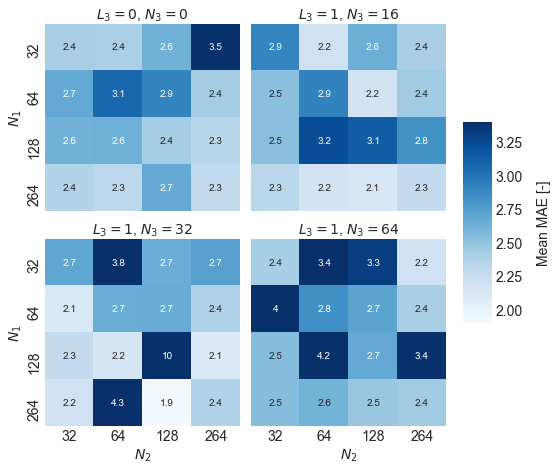

In [90]:
fig,ax = plt.subplots(2,2,sharey=True,sharex=True,figsize=(8,7))

ax = ax.flatten()
cbar_ax = fig.add_axes([0.81, .3, .05, .4])

dfs = []
dfs.append(pd.read_pickle('df_mean_0').apply(pd.to_numeric))
dfs.append(pd.read_pickle('df_mean_16').apply(pd.to_numeric))
dfs.append(pd.read_pickle('df_mean_32').apply(pd.to_numeric))
dfs.append(pd.read_pickle('df_mean_64').apply(pd.to_numeric))

titles = ['$L_3=0$, $N_3=0$','$L_3=1$, $N_3=16$','$L_3=1$, $N_3=32$','$L_3=1$, $N_3=64$']
for i,df in enumerate(dfs):
    sns.heatmap(df,ax=ax[i],vmin=1.9,vmax=3.4,cmap='Blues',annot=True,cbar=i == 0,cbar_ax=None if i else cbar_ax)
    #ax[i].tick_params(labelsize=12)
    ax[i].set_title(titles[i])
cbar_ax.set_ylabel('Mean MAE [-]',labelpad=15)
ax[0].set_ylabel('$N_1$')
ax[2].set_ylabel('$N_1$')

ax[2].set_xlabel('$N_2$')
ax[3].set_xlabel('$N_2$')

fig.tight_layout(rect=[0, 0, 0.8, 0.95])
fig.savefig("hyperparam_opt.pdf")

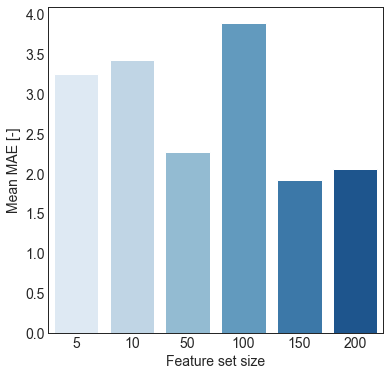

In [109]:
mae = [3.25153223, 3.42967686, 2.27302085, 3.89897162, 1.91826897,2.05675035]
sizes = ['5','10','50','100','150','200']
fig,ax = plt.subplots(figsize=(6,6))
sns.barplot(sizes,mae,ax=ax,palette="Blues",order=sizes)
ax.set_xlabel("Feature set size")
ax.set_ylabel("Mean MAE [-]")

fig.savefig('feat_size_opt.pdf')

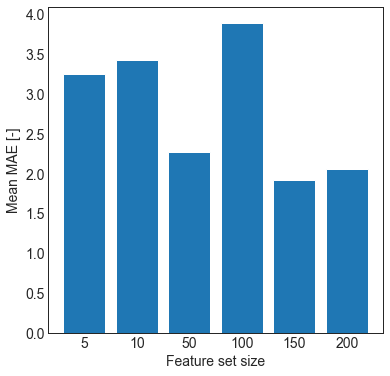

In [113]:
fig,ax = plt.subplots(figsize=(6,6))
ax.bar(sizes,mae)

ax.set_xlabel("Feature set size")
ax.set_ylabel("Mean MAE [-]")

fig.savefig('feat_size_opt.pdf')